In [3]:
import pandas as pd

# Read the CSV file
df_misinformation = pd.read_csv("C:/Users/jr24440/Downloads/twitter-map_Climate_Change_Misinformation.csv")


In [4]:
import pandas as pd

# Read the CSV file
df_tweets = pd.read_csv("C:/Users/jr24440/Downloads/twitter-map_Climate_Change.csv")


In [5]:
print(df_misinformation.columns)
print(df_misinformation.head())
print(df_misinformation.dtypes)
print(df_misinformation['local_time'].head(10))

Index(['text', 'text_cleaned', 'retweet_count', 'local_time', 'tweetId',
       'id_'],
      dtype='object')
                                                text  \
0  DEFCON 5: “We have an imperative to build a ‘p...   
1  I am not @nytimes. I saw policemen breaking cc...   
2  The United States receives no oil from Lybia. ...   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...   
4  While the AP reported on the sluggish jobs rep...   

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1  I am not @nytimes. I saw policemen breaking cc...           2773   
2  The United States receives no oil from Lybia. ...           1700   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...           2182   
4  While the AP reported on the sluggish jobs rep...          14684   

     local_time                                            tweetId   id_  
0  1.593780e+12  http://twitter.com/i/web/status/12

In [7]:
# Convert 'local_time' to datetime objects
df_misinformation['local_time'] = pd.to_datetime(df_misinformation['local_time'], unit='ms')

# Print the first few rows of the 'local_time' column to verify the conversion
print(df_misinformation['local_time'].head())

0   2020-07-03 12:40:00
1   2020-03-12 16:20:00
2   2011-03-07 17:46:40
3   2020-10-29 14:00:00
4   2021-12-06 22:33:20
Name: local_time, dtype: datetime64[ns]


In [8]:
# Find the earliest and latest dates in the 'local_time' column
earliest_date = df_misinformation['local_time'].min()
latest_date = df_misinformation['local_time'].max()

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

Earliest date: 2009-11-19 00:20:00
Latest date: 2022-11-25 09:53:20


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Resample the data to daily frequency and count the number of tweets per day
daily_tweets = df_misinformation.resample('D', on='local_time')['tweetId'].count()

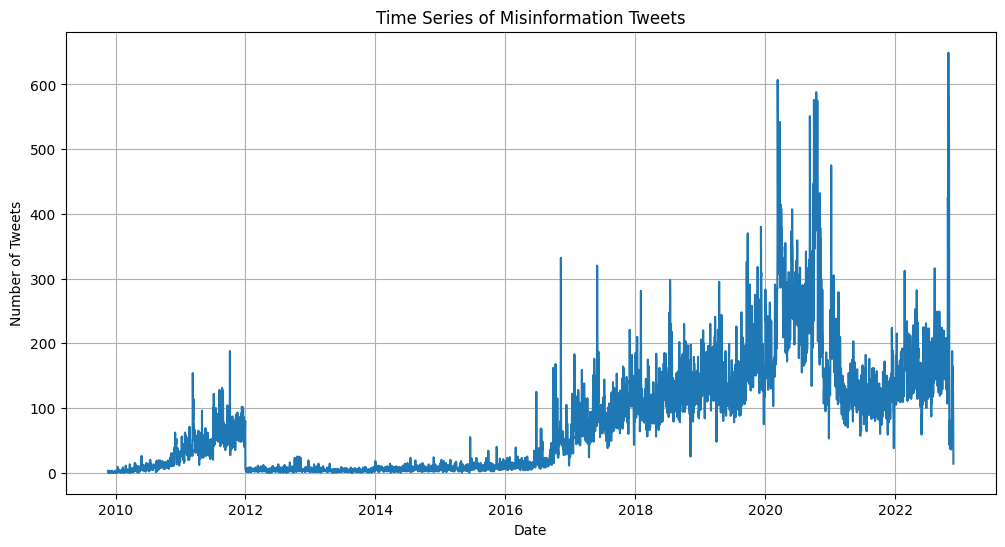

In [11]:
# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_tweets.index, daily_tweets.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Time Series of Misinformation Tweets')
plt.grid(True)
plt.show()

In [12]:
display(df_tweets.head())

,text_cleaned,retweet_count,text,local_time,tweetId,id_
0,DEFCON 5: “We have an imperative to build a ‘p...,4620,DEFCON 5: “We have an imperative to build a ‘p...,1.593780e+12,http://twitter.com/i/web/status/12790213512868...,BFVo
1,Its all happening .,1638,Its all happening .,1.422300e+12,http://twitter.com/i/web/status/55977236029571...,Od1p
2,The United States receives no oil from Lybia. ...,1700,The United States receives no oil from Lybia. ...,1.299520e+12,http://twitter.com/i/web/status/44823891817922560,UQ78
3,The moon is in Aries and it is full. People ar...,3051,The moon is in Aries and it is full. People ar...,1.507180e+12,http://twitter.com/i/web/status/91579793972079...,KhvM
4,energy flows where our intention goes.... CREA...,10464,energy flows where our intention goes.... CREA...,1.344960e+12,http://twitter.com/i/web/status/23540075769485...,RV5O


In [13]:
print(f"DataFrame shape: {df_tweets.shape}")
print("\nData types:")
print(df_tweets.dtypes)

print("\nUnique values for 'local_time':")
print(df_tweets['local_time'].unique())
print(f"\nRange of 'local_time': {df_tweets['local_time'].min()} to {df_tweets['local_time'].max()}")

print("\nMissing values:")
print(df_tweets.isnull().sum())

DataFrame shape: (288472, 6)

Data types:
text_cleaned      object
retweet_count      int64
text              object
local_time       float64
tweetId           object
id_               object
dtype: object

Unique values for 'local_time':
[1.59378e+12 1.42230e+12 1.29952e+12 ... 1.47400e+12 1.46217e+12
 1.40551e+12]

Range of 'local_time': 1258580000000.0 to 1669380000000.0

Missing values:
text_cleaned     0
retweet_count    0
text             0
local_time       0
tweetId          0
id_              0
dtype: int64


In [17]:
# Convert 'local_time' to datetime objects
df_tweets['local_time'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Group by date and count the number of tweets
tweet_counts = df_tweets.groupby(df_tweets['local_time'].dt.date)['text_cleaned'].count()

# Display the first few rows of tweet counts
print(tweet_counts.head())

local_time
2009-11-18    1
2009-11-19    4
2009-11-21    1
2009-11-22    3
2009-11-23    2
Name: text_cleaned, dtype: int64


In [18]:
# Convert 'local_time' to datetime objects
df_tweets['local_time'] = pd.to_datetime(df_tweets['local_time'])

# Extract the minimum and maximum dates
min_date = df_tweets['local_time'].min().date()
max_date = df_tweets['local_time'].max().date()

print(f"Date range: {min_date} to {max_date}")

# Create a new column containing only the date portion
df_tweets['date'] = df_tweets['local_time'].dt.date

Date range: 2009-11-18 to 2022-11-25


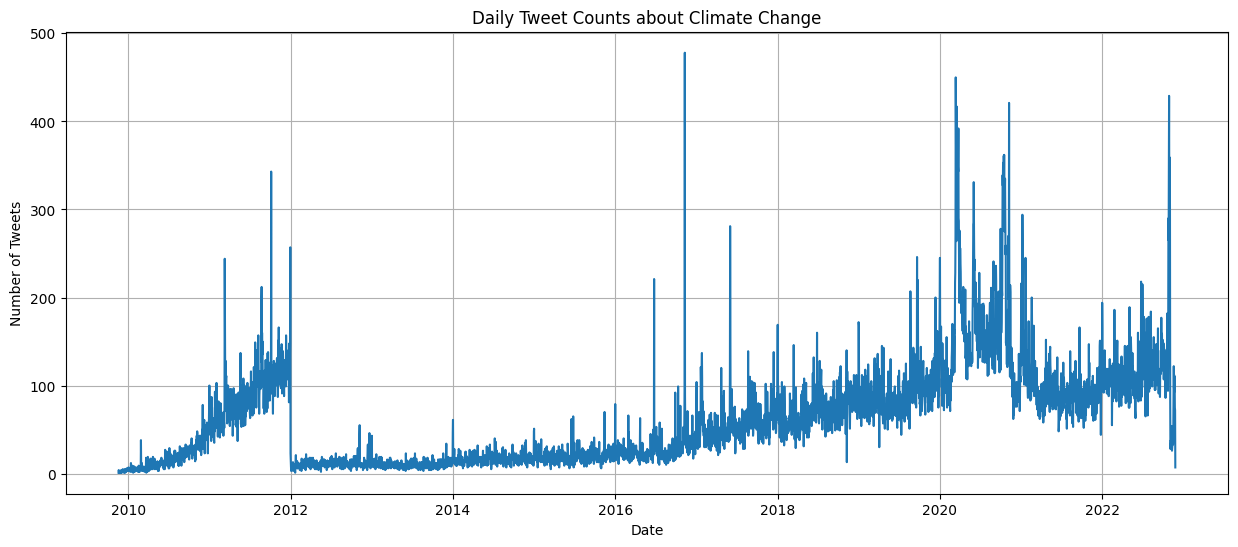

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(tweet_counts.index, tweet_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Daily Tweet Counts about Climate Change')
plt.grid(True)
plt.show()

In [20]:
# Assuming your DataFrames are named 'df' (climate change) and 'df_misinformation' (misinformation)

# For the climate change dataset:
df_tweets_2012 = df_tweets[df_tweets['local_time'] >= '2012-01-01']

# For the misinformation dataset:
df_misinformation_2012 = df_misinformation[df_misinformation['local_time'] >= '2012-01-01']

In [21]:
# For the climate change dataset:
df_tweets_2012 = df_tweets_2012.reset_index(drop=True)

# For the misinformation dataset:
df_misinformation_2012 = df_misinformation_2012.reset_index(drop=True)

In [22]:
print(df_tweets_2012['local_time'].min())  # For the climate change dataset
print(df_misinformation_2012['local_time'].min())  # For the misinformation dataset

2012-01-01 01:06:40
2012-01-01 01:06:40


In [23]:
# Resample the data to daily frequency and count the number of tweets per day
daily_tweets_2012 = df_misinformation_2012.resample('D', on='local_time')['tweetId'].count()

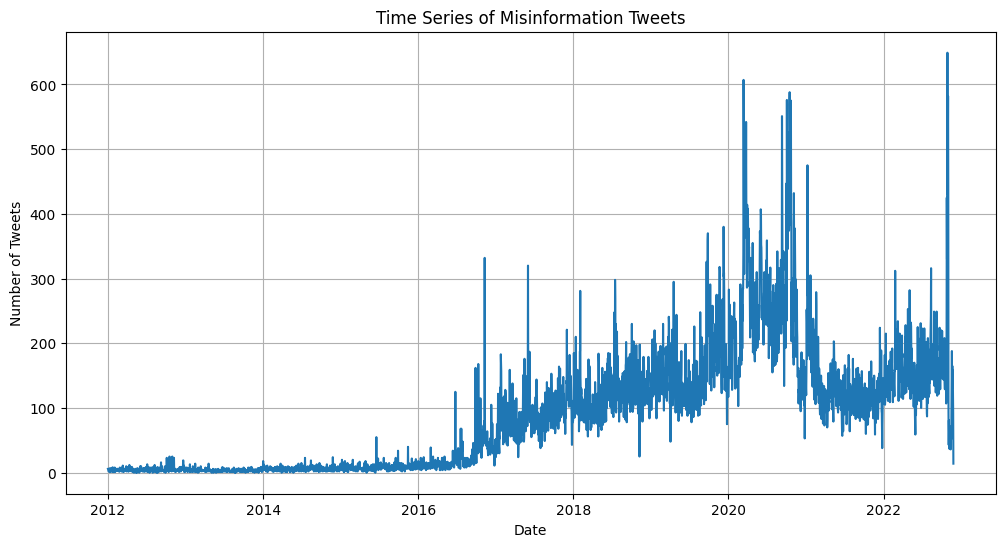

In [24]:
# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_tweets_2012.index, daily_tweets_2012.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Time Series of Misinformation Tweets')
plt.grid(True)
plt.show()

In [25]:
# Group by date and count the number of tweets
tweet_counts_2012 = df_tweets_2012.groupby(df_tweets_2012['local_time'].dt.date)['text_cleaned'].count()

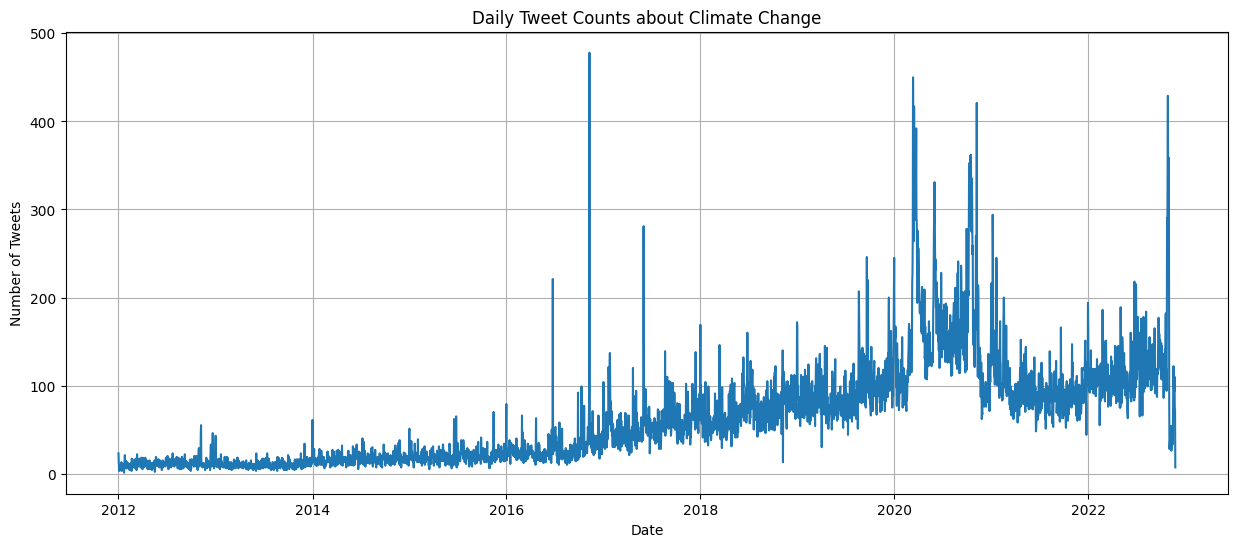

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(tweet_counts_2012.index, tweet_counts_2012.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Daily Tweet Counts about Climate Change')
plt.grid(True)
plt.show()

In [27]:
print(df_tweets_2012.head())

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1                                Its all happening .           1638   
2  The moon is in Aries and it is full. People ar...           3051   
3  energy flows where our intention goes.... CREA...          10464   
4  Dear Nigerians in Nigeria Save the country if ...           2112   

                                                text          local_time  \
0  DEFCON 5: “We have an imperative to build a ‘p... 2020-07-03 12:40:00   
1                                Its all happening . 2015-01-26 19:20:00   
2  The moon is in Aries and it is full. People ar... 2017-10-05 05:06:40   
3  energy flows where our intention goes.... CREA... 2012-08-14 16:00:00   
4  Dear Nigerians in Nigeria Save the country if ... 2021-09-26 07:06:40   

                                             tweetId   id_        date  
0  http://twitter.com/i/web/status/12790213

In [28]:
print(df_misinformation_2012.head())

                                                text  \
0  DEFCON 5: “We have an imperative to build a ‘p...   
1  I am not @nytimes. I saw policemen breaking cc...   
2  I already know ⁦@NYGovCuomo⁩ is going to blame...   
3  While the AP reported on the sluggish jobs rep...   
4  not ONE sentence in this piece abt how the pre...   

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1  I am not @nytimes. I saw policemen breaking cc...           2773   
2  I already know ⁦@NYGovCuomo⁩ is going to blame...           2182   
3  While the AP reported on the sluggish jobs rep...          14684   
4  not ONE sentence in this piece abt how the pre...           1680   

           local_time                                            tweetId   id_  
0 2020-07-03 12:40:00  http://twitter.com/i/web/status/12790213512868...  BFVo  
1 2020-03-12 16:20:00  http://twitter.com/i/web/status/12381547141910...  

In [29]:
# Compute the intersection of tweet IDs from both datasets
common_ids = set(df_tweets_2012['tweetId']) & set(df_misinformation_2012['tweetId'])
num_common = len(common_ids)
print("Number of tweets in both datasets:", num_common)

Number of tweets in both datasets: 104947


In [30]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Instantiate the analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to determine sentiment based on the compound score
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each dataset's text column
df_tweets_2012['sentiment'] = df_tweets_2012['text'].apply(get_sentiment)
df_misinformation_2012['sentiment'] = df_misinformation_2012['text'].apply(get_sentiment)

# Optional: Print out counts of each sentiment category for each dataset
print("Sentiment counts in df_tweets_2012:")
print(df_tweets_2012['sentiment'].value_counts())

print("\nSentiment counts in df_misinformation_2012:")
print(df_misinformation_2012['sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jr24440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment counts in df_tweets_2012:
sentiment
positive    109589
negative     79914
neutral      58361
Name: count, dtype: int64

Sentiment counts in df_misinformation_2012:
sentiment
negative    188671
positive    115354
neutral      45994
Name: count, dtype: int64


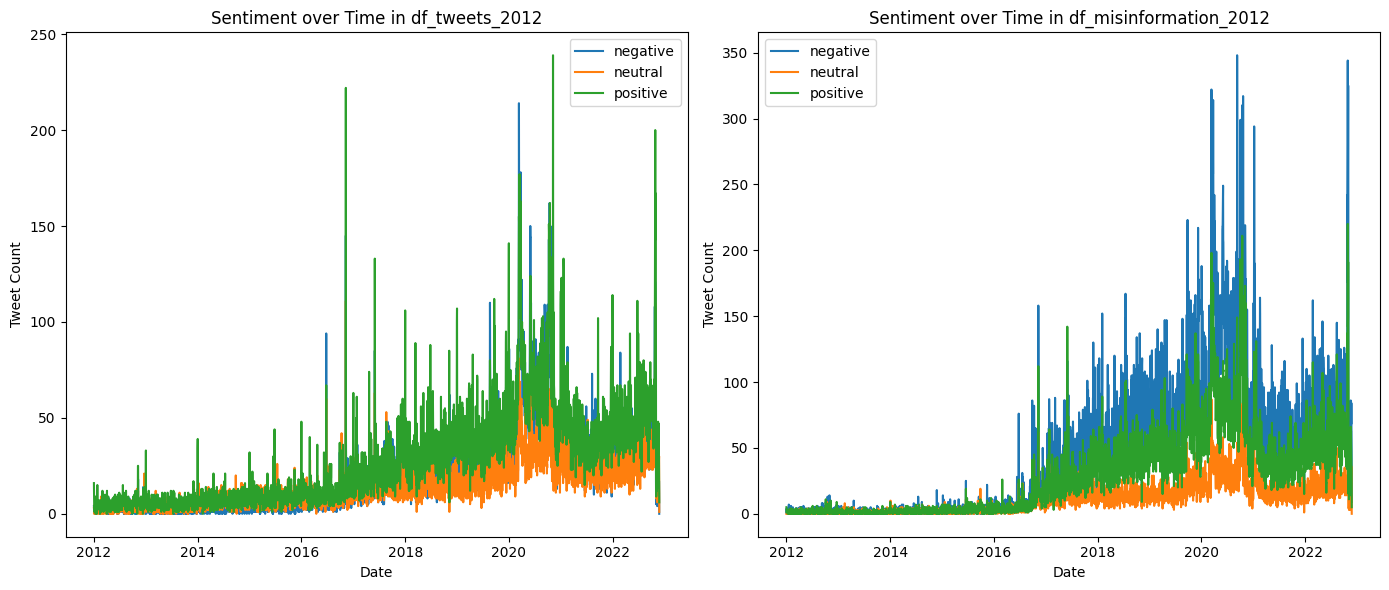

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the local_time column to datetime if not already done
df_tweets_2012['local_time'] = pd.to_datetime(df_tweets_2012['local_time'])
df_misinformation_2012['local_time'] = pd.to_datetime(df_misinformation_2012['local_time'])

# Group by day and sentiment, then count the tweets in each group
tweets_grouped = df_tweets_2012.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)
misinfo_grouped = df_misinformation_2012.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Create subplots for each dataset
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_grouped.columns:
    plt.plot(tweets_grouped.index, tweets_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in df_tweets_2012')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_grouped.columns:
    plt.plot(misinfo_grouped.index, misinfo_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in df_misinformation_2012')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the tweets' text (adjust max_features as needed)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
doc_term_matrix = vectorizer.fit_transform(df_tweets_2012['text_cleaned'])

# Fit an LDA model
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(doc_term_matrix)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}:")
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(top_words)


Top 10 words for topic #0:
['going', 'time', 'changed', 'let', 'make', 'things', 'change', 'life', 'don', 'people']
Top 10 words for topic #1:
['americans', 'american', 'biden', 'pandemic', 'people', 'america', 'coronavirus', 'covid', 'president', 'trump']
Top 10 words for topic #2:
['2020', 'thank', 'coming', 'god', 'day', 'world', 'years', 'time', 'year', 'new']
Top 10 words for topic #3:
['new', 'deal', 'country', 'brexit', 'government', 'people', 'today', 'world', 'change', 'climate']
Top 10 words for topic #4:
['world', 'getting', 'say', 'man', 'water', 'change', 'know', 'people', 'just', 'like']


In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the tweets' text (adjust max_features as needed)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
doc_term_matrix_2 = vectorizer.fit_transform(df_misinformation_2012['text_cleaned'])

# Fit an LDA model
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(doc_term_matrix_2)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}:")
    top_words_2 = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(top_words_2)


Top 10 words for topic #0:
['women', 'people', 'lie', 'just', 'uk', 'brexit', 'government', 'johnson', 'new', 'year']
Top 10 words for topic #1:
['video', 'ago', 'tweet', '19', 'house', 'report', 'white', 'coronavirus', 'trump', 'covid']
Top 10 words for topic #2:
['world', 'climate', 'news', 'change', 'just', 'know', 'media', 'like', 'don', 'people']
Top 10 words for topic #3:
['says', 'donald', 'fbi', 'russian', 'breaking', 'campaign', 'russia', 'election', 'president', 'trump']
Top 10 words for topic #4:
['fox', 'states', 'joe', 'just', 'americans', '000', 'people', 'president', 'biden', 'trump']


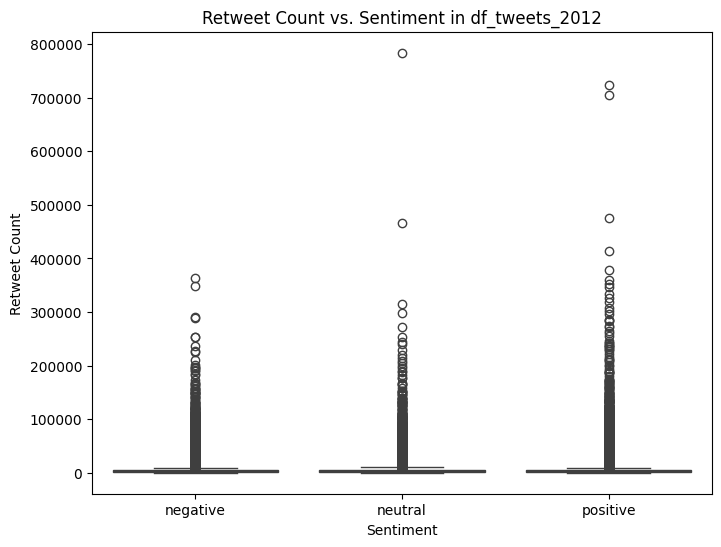

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='retweet_count', data=df_tweets_2012)
plt.title("Retweet Count vs. Sentiment in df_tweets_2012")
plt.xlabel("Sentiment")
plt.ylabel("Retweet Count")
plt.show()


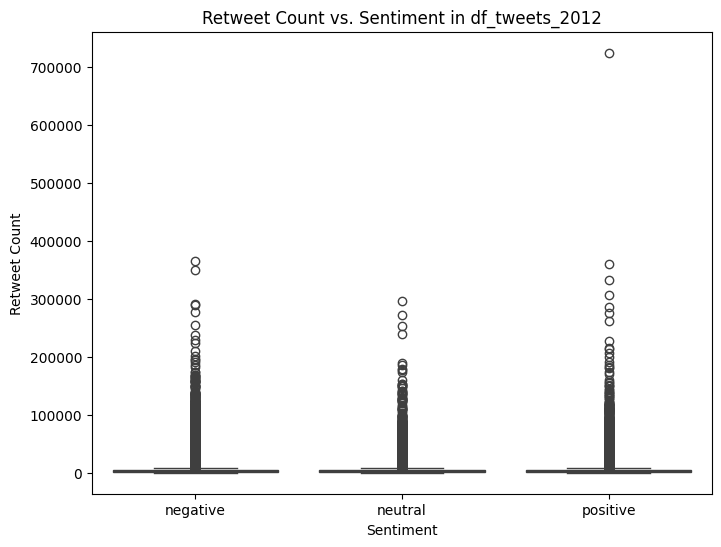

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='retweet_count', data=df_misinformation_2012)
plt.title("Retweet Count vs. Sentiment in df_tweets_2012")
plt.xlabel("Sentiment")
plt.ylabel("Retweet Count")
plt.show()


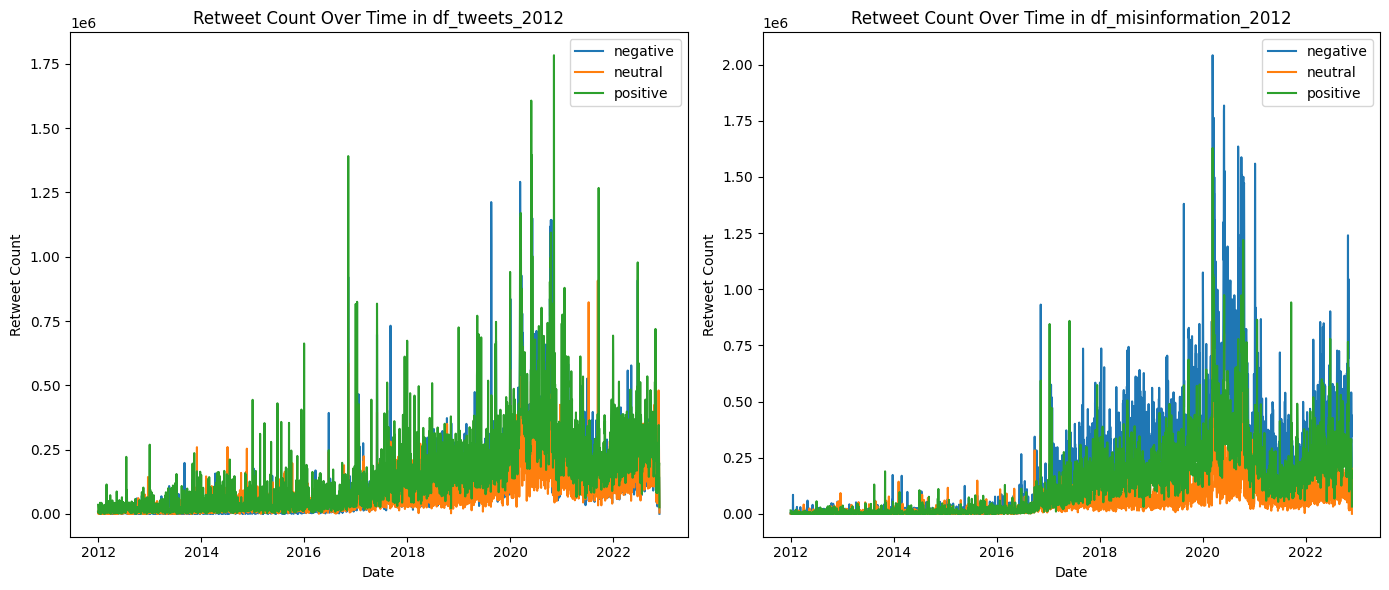

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the local_time column is datetime
df_tweets_2012['local_time'] = pd.to_datetime(df_tweets_2012['local_time'])
df_misinformation_2012['local_time'] = pd.to_datetime(df_misinformation_2012['local_time'])

# Group by day and sentiment and sum the retweet counts
tweets_retweets = df_tweets_2012.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)
misinfo_retweets = df_misinformation_2012.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_retweets.columns:
    plt.plot(tweets_retweets.index, tweets_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in df_tweets_2012')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_retweets.columns:
    plt.plot(misinfo_retweets.index, misinfo_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in df_misinformation_2012')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

plt.tight_layout()
plt.show()
